In [1]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs1/home/jackyu/anaconda3/envs/work/lib/python3.4/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs1/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'tsfc', 
            'pressure_reference_high',
            'temperature_reference_high', 
            'pressure_reference_low', 
            'temperature_reference_low',
            'ighigh', 
            'ng', 
            'absth',
            'wgt']


def pattern_assign(name):
    return ''' 
    parameter .* :: .* ({} .* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/]+ {}[^,] [^/]+ / [^/]+ /)
    '''.format(name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [3]:
analysis = scripts.Analysis()

In [4]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs1/home/jackyu/radiation/crd',
                          'LW/examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band02_wn_340_540',
                          'ng_30/g_ascending',
                          'refPTs_P_200_T_250__P_1_T_250',
                          'ighigh_15',
                          'getabsth_auto__auto',
                          'absth_dlogN_uniform__dlogN_uniform',
                          'wgt_all_.3__all_.3',
                          'atmpro_mls')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [5]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs1/home/jackyu/radiation/crd',
                          'LW/examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band02_wn_340_540',
                          'ng_30/g_ascending',
                          'refPTs_P_200_T_250__P_1_T_250',
                          'ighigh_15',
                          'getabsth_auto__auto',
                          'absth_dlogN_uniform__dlogN_uniform',
                          'wgt_all_.3__all_.3',
                          'atmpro_mls')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [6]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = list(range(1, 30 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [7]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [8]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [9]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [10]:
# print some input parameters

with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 340

nband = 200

nv = 200

dv = 0.005

tsfc = 294.0

pressure_reference_high = 1.

temperature_reference_high = 250.

pressure_reference_low = 200.

temperature_reference_low = 250.

ighigh = 15

ngas = 6      

ng = 30

data absth(:, 1) /

!     thresholds for reference (P, T) low
!     data absth(:, 2) /

data wgt
     &     /30 * .3/

include 'mls75.pro'


In [11]:
fig.display_hrefanchor()

In [12]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [13]:
table_dgdgs.display_hrefanchor()

In [14]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [15]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: flux, cooling rate g-group 1

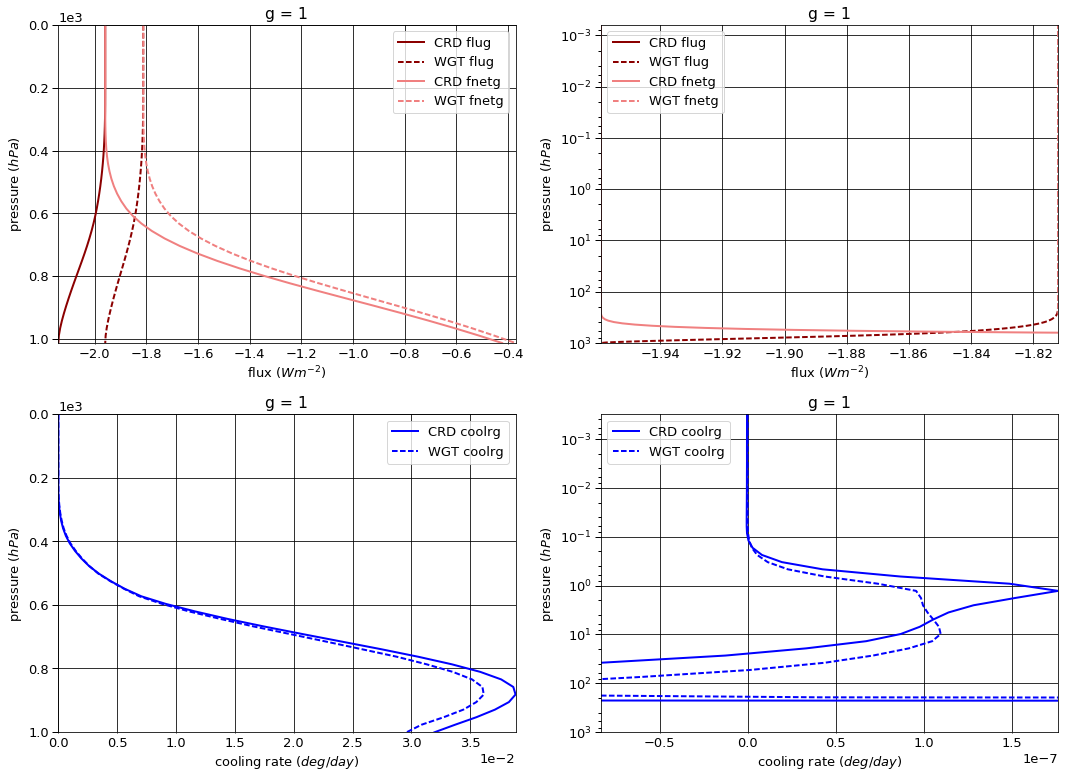

# Figure: flux, cooling rate g-group 2

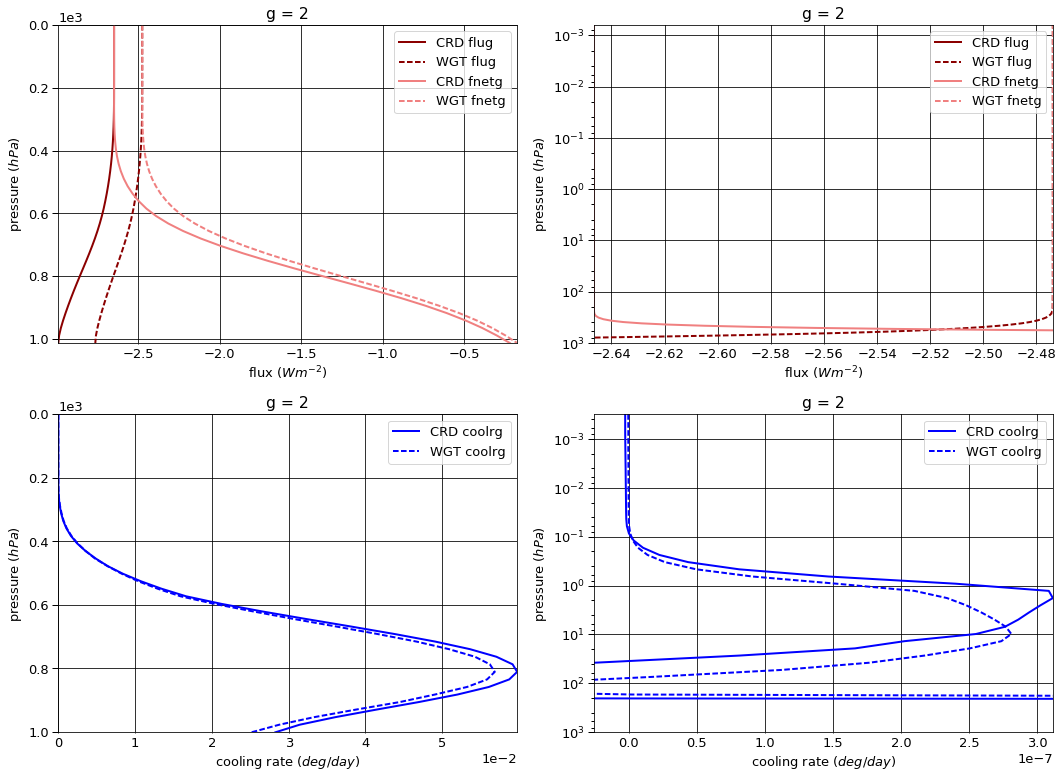

# Figure: flux, cooling rate g-group 3

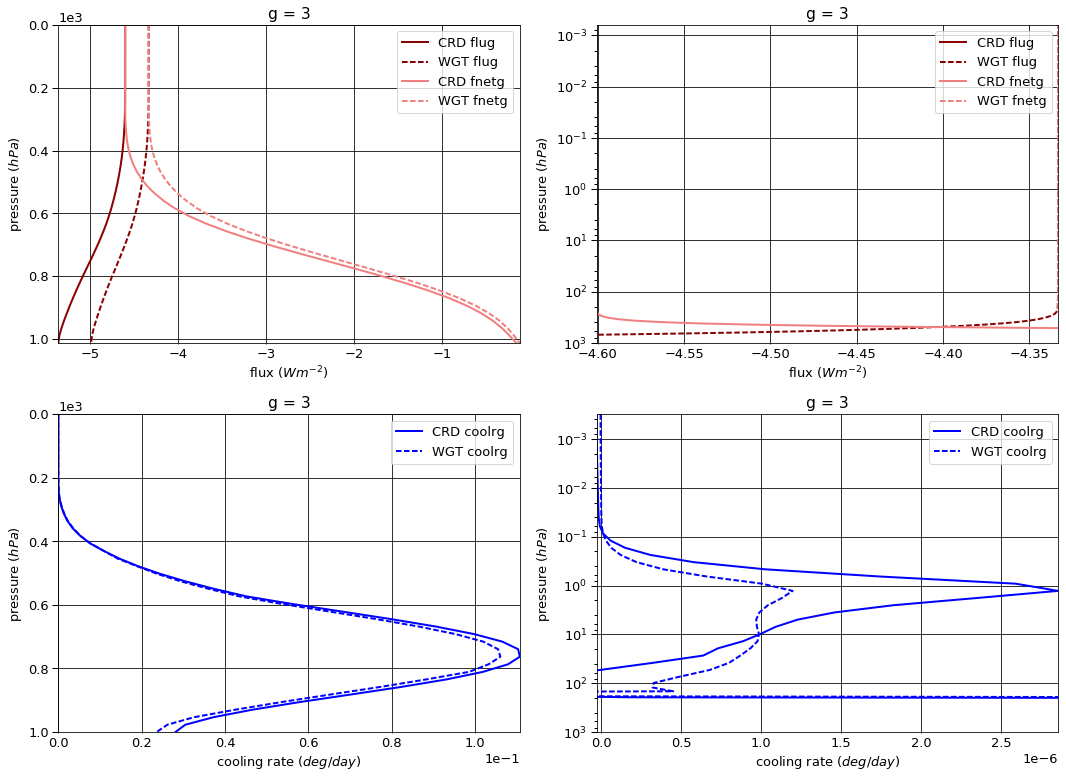

# Figure: flux, cooling rate g-group 4

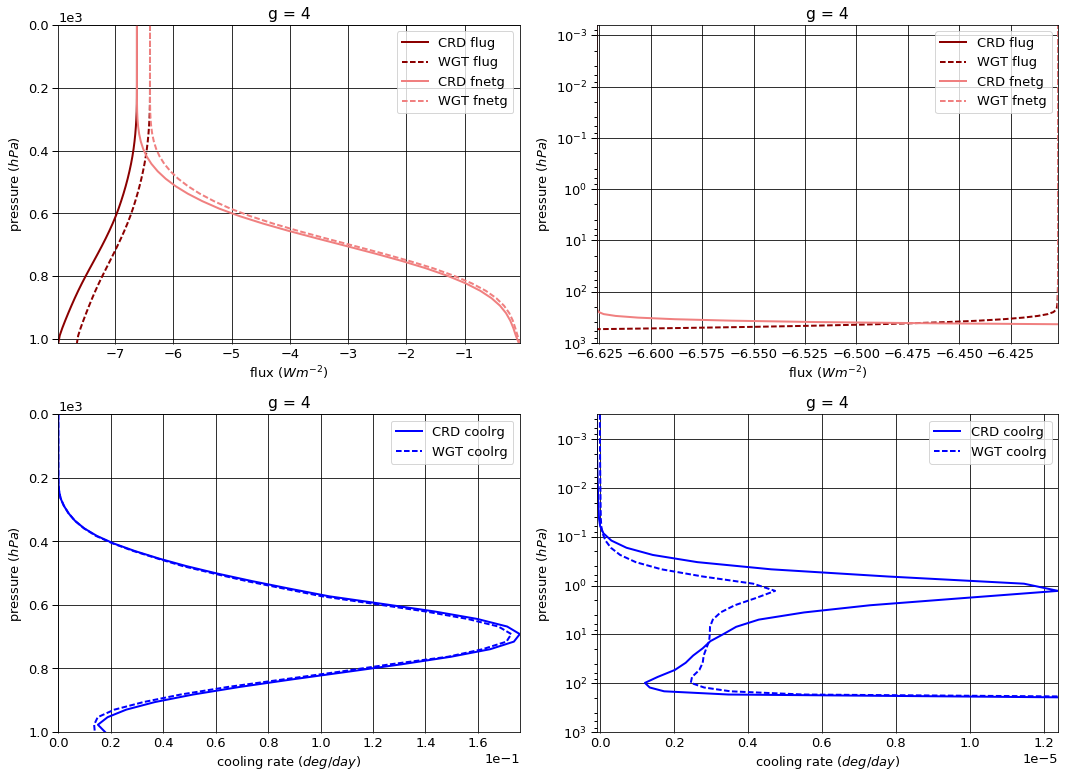

# Figure: flux, cooling rate g-group 5

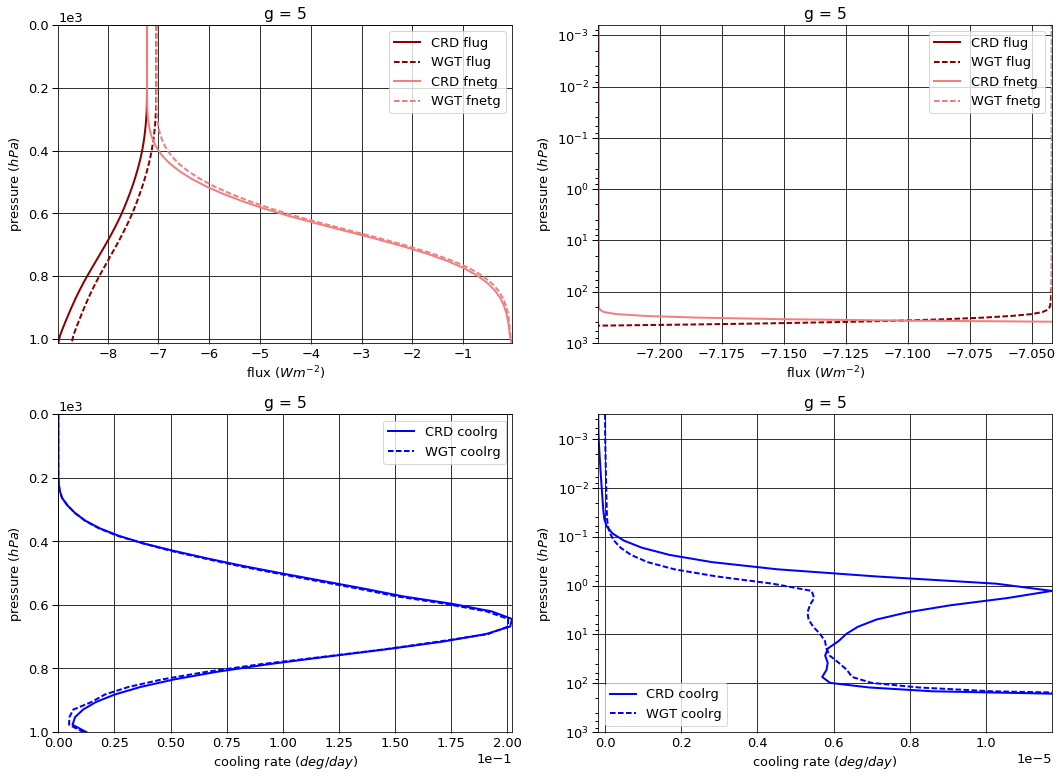

# Figure: flux, cooling rate g-group 6

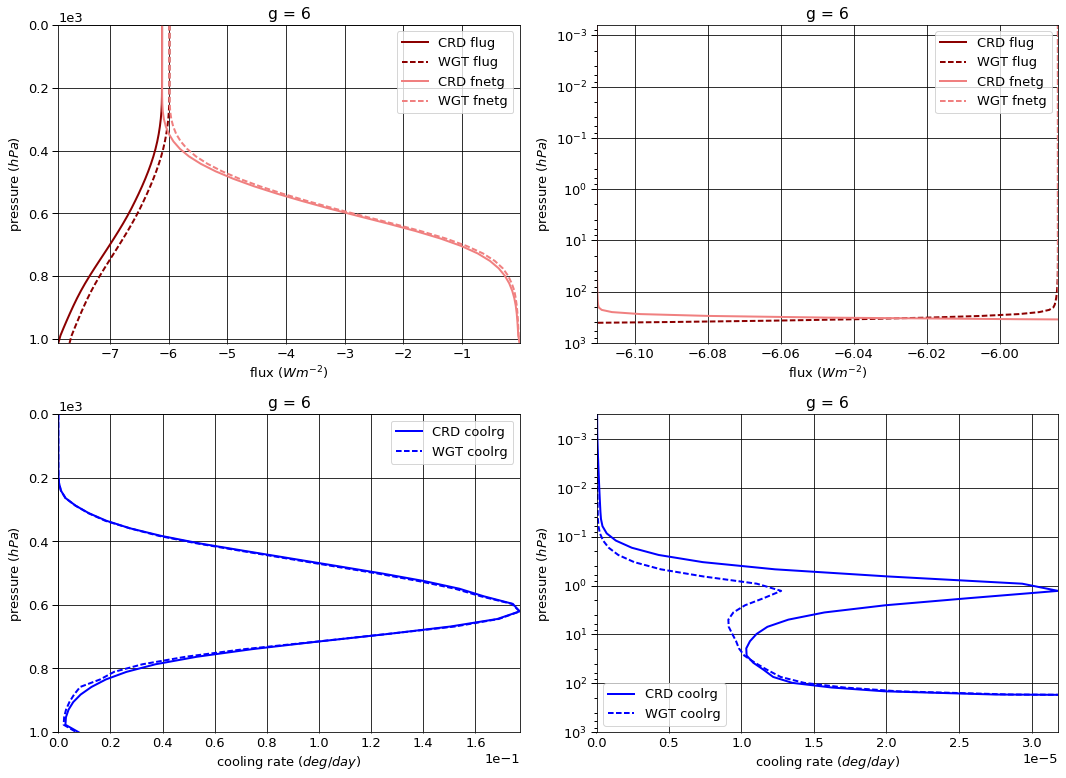

# Figure: flux, cooling rate g-group 7

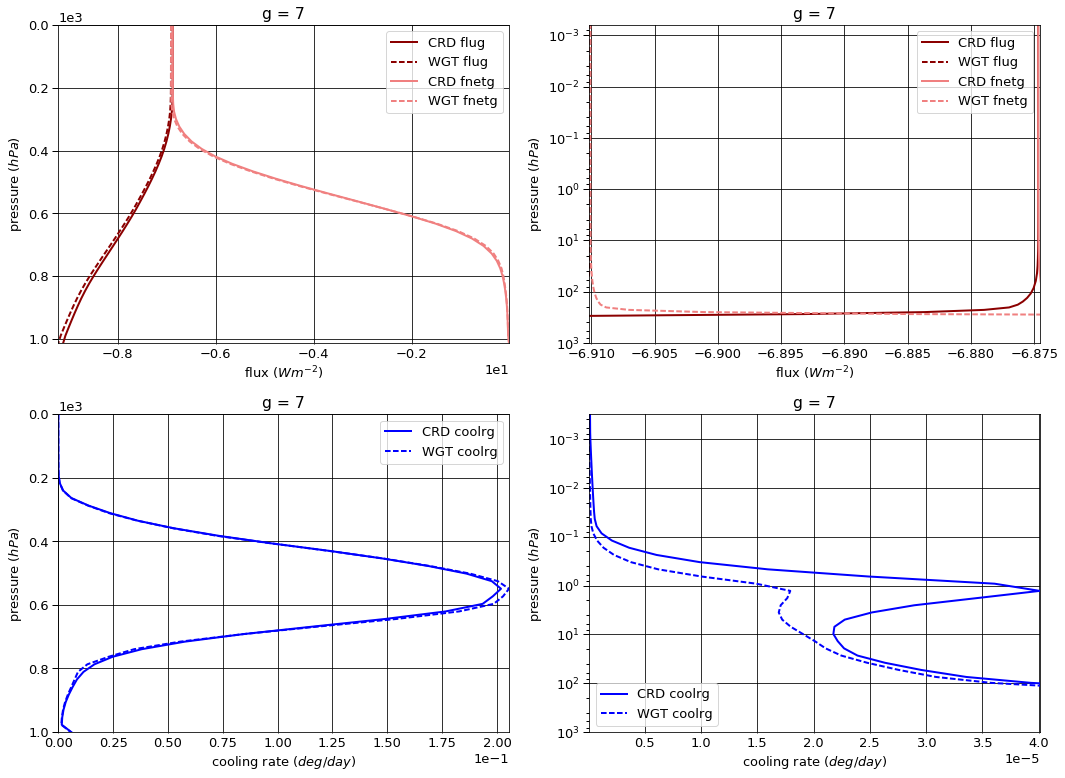

# Figure: flux, cooling rate g-group 8

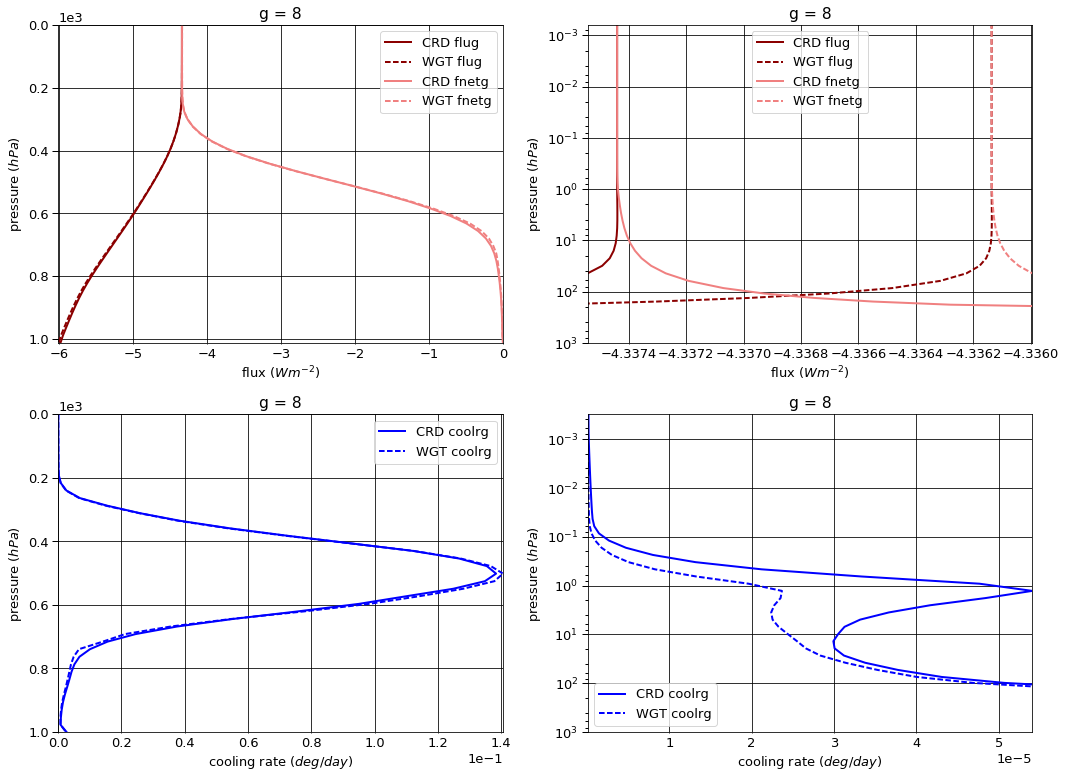

# Figure: flux, cooling rate g-group 9

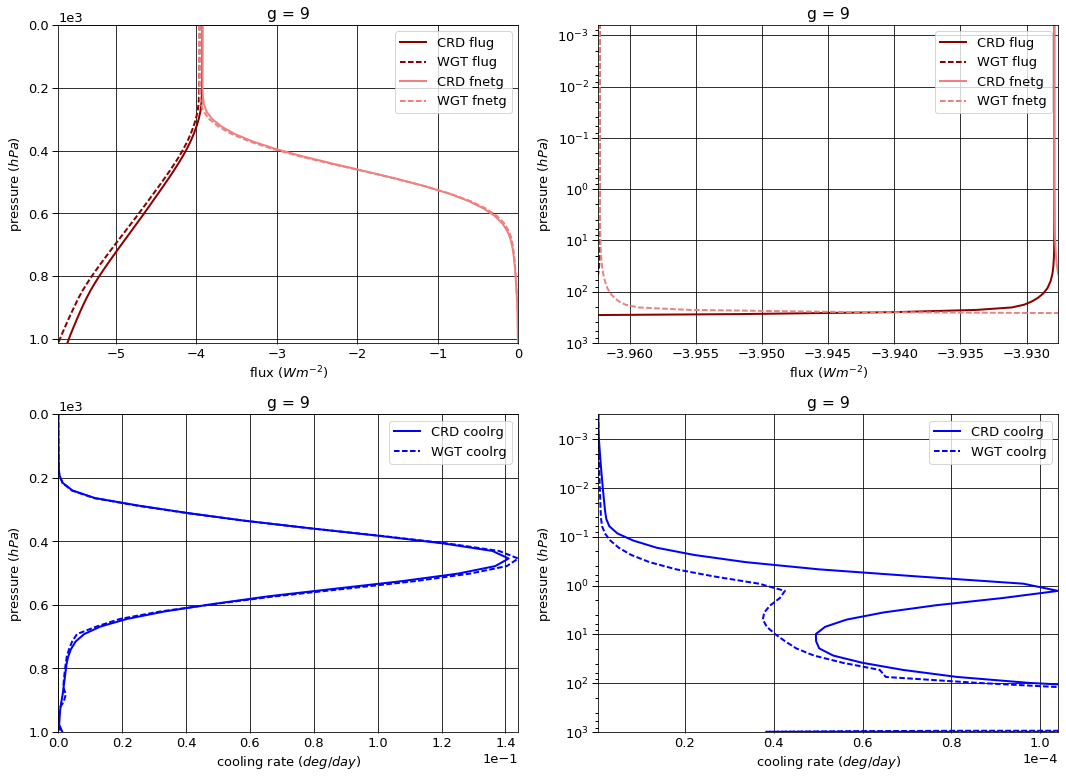

# Figure: flux, cooling rate g-group 10

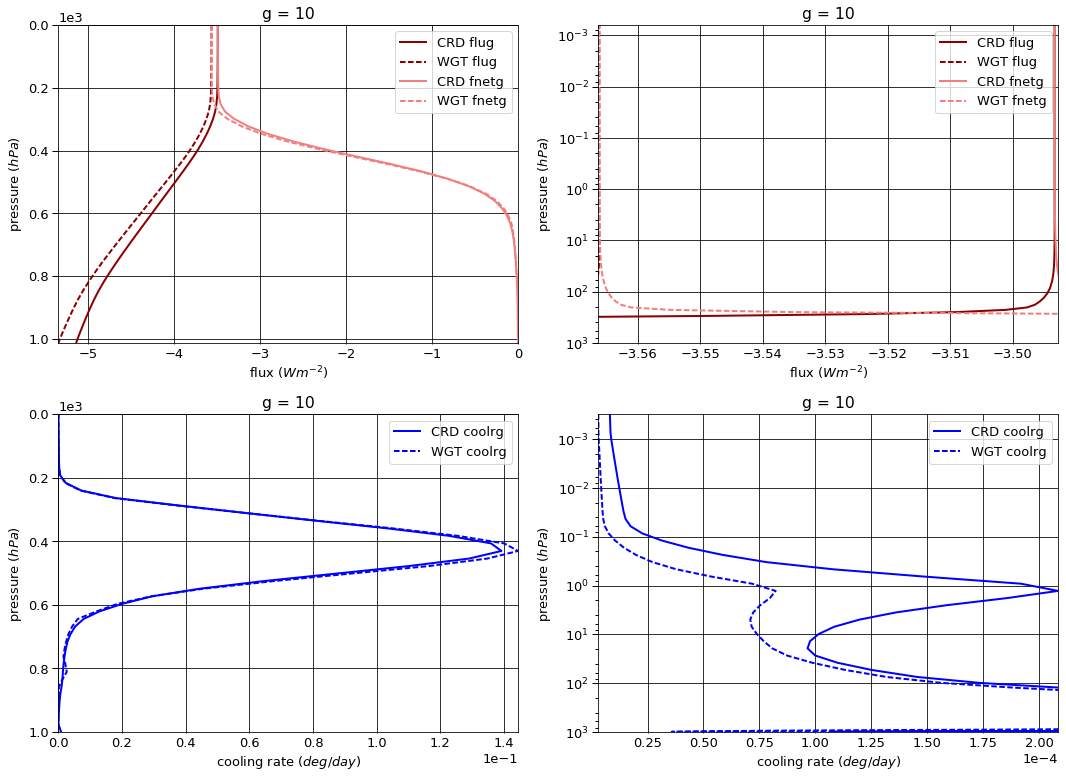

# Figure: flux, cooling rate g-group 11

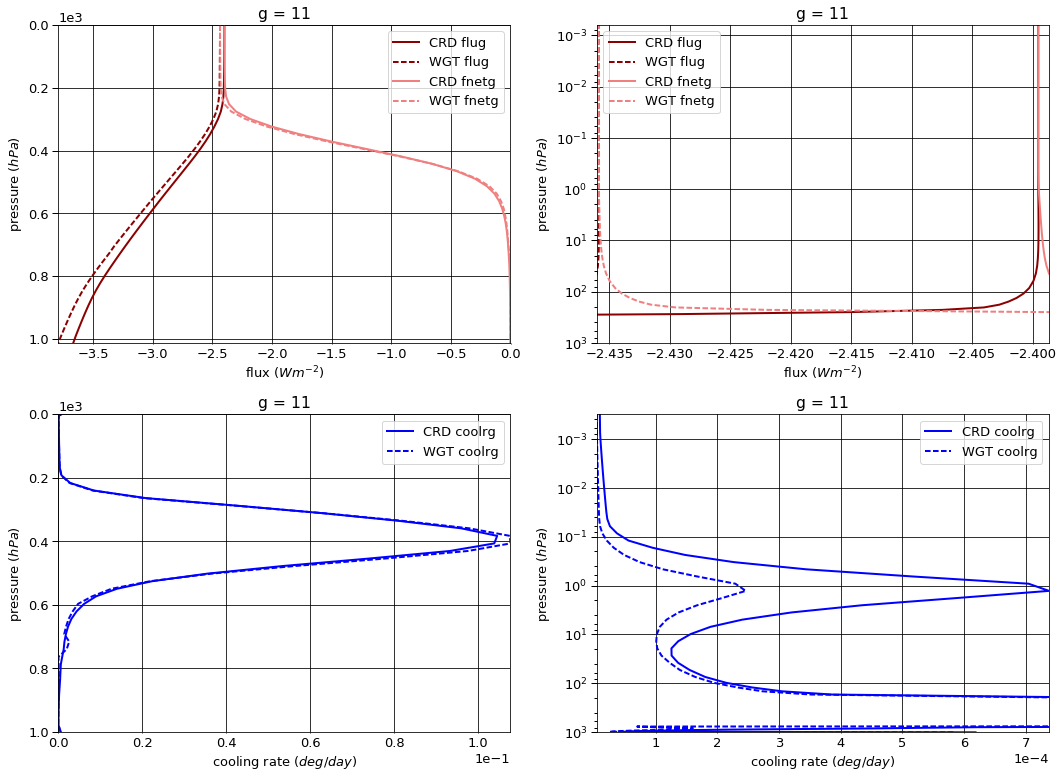

# Figure: flux, cooling rate g-group 12

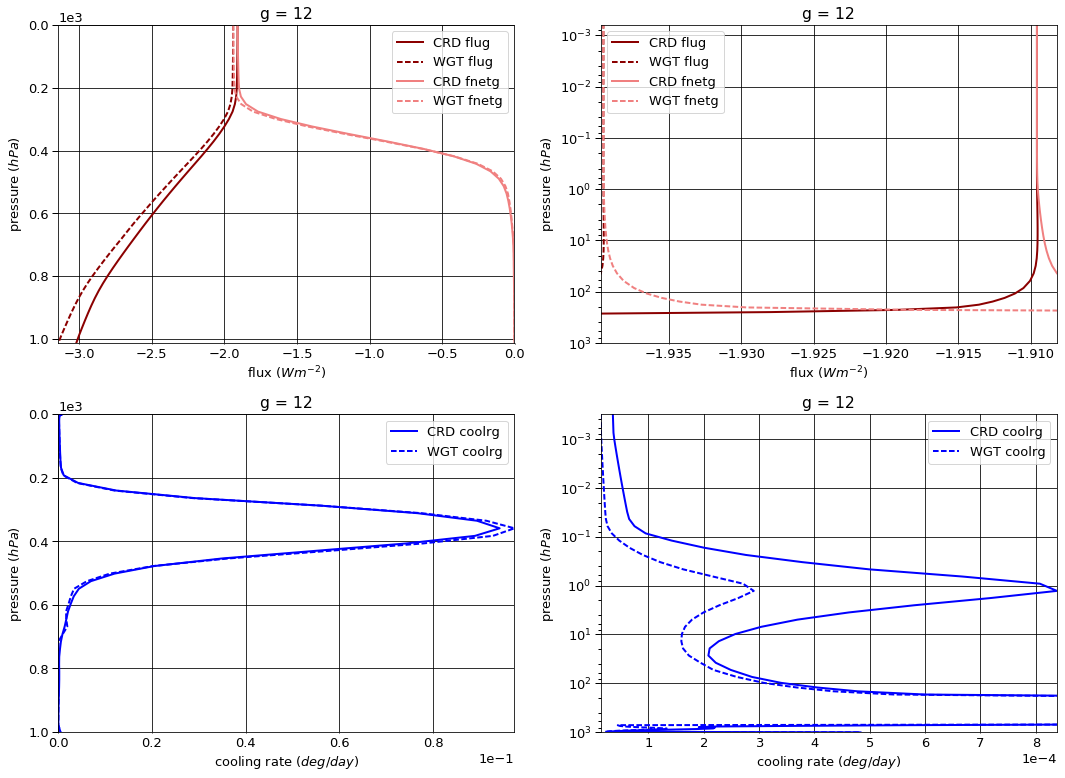

# Figure: flux, cooling rate g-group 13

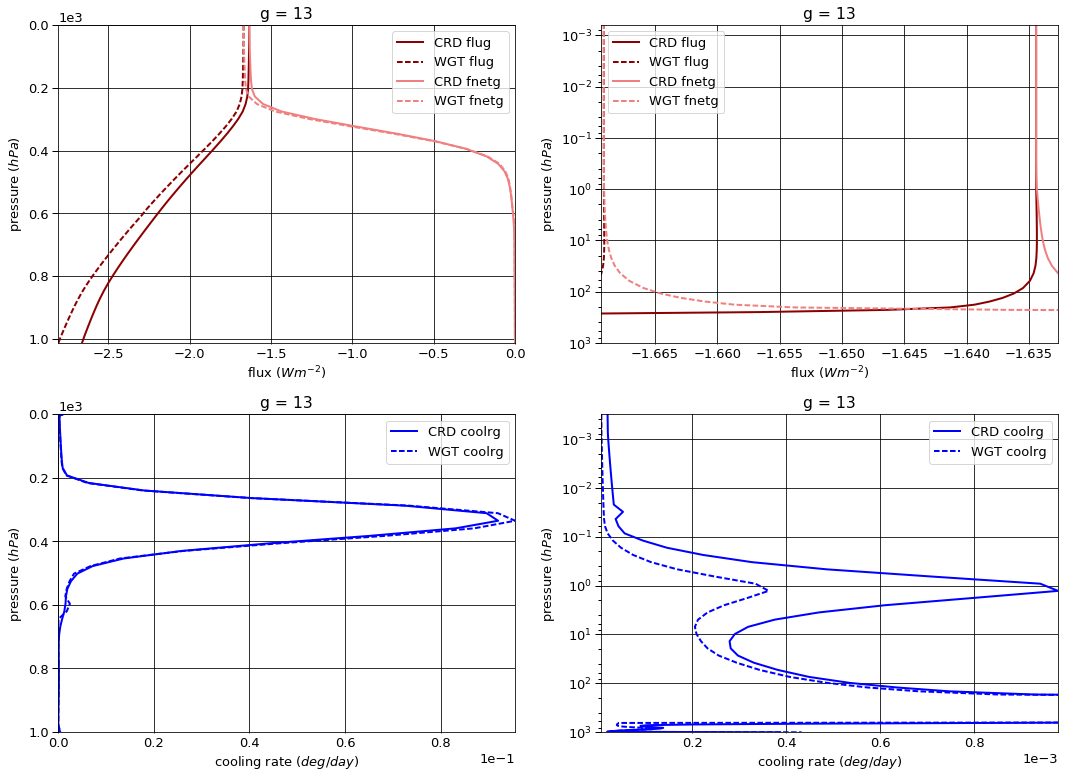

# Figure: flux, cooling rate g-group 14

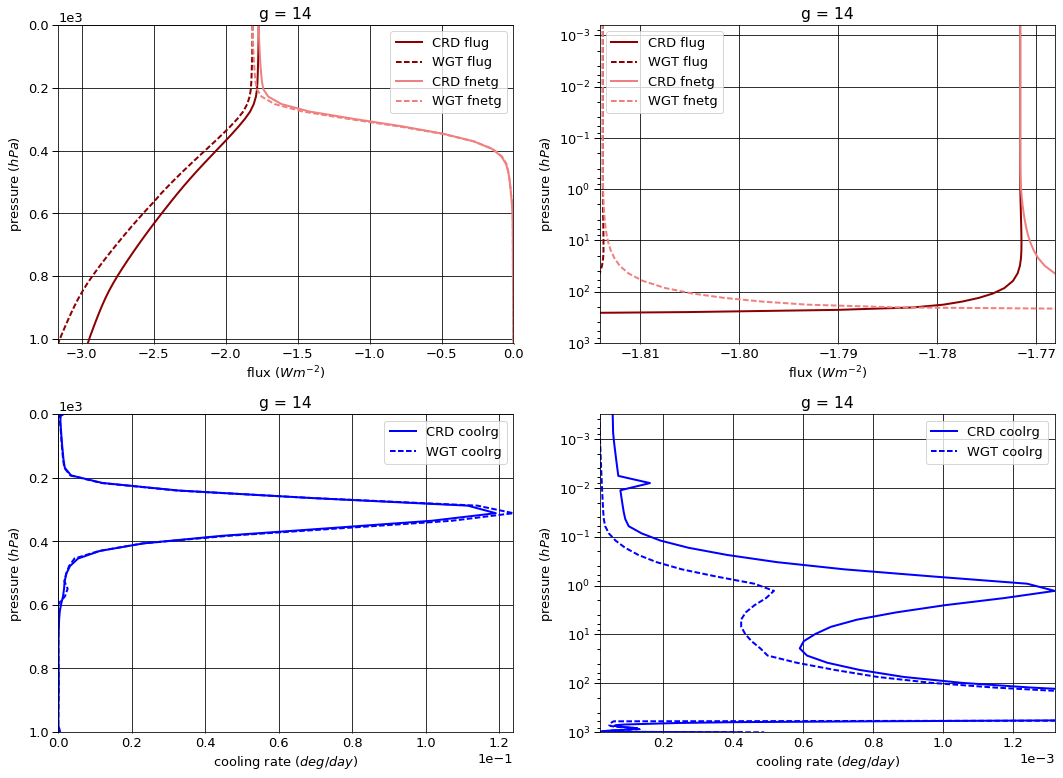

# Figure: flux, cooling rate g-group 15

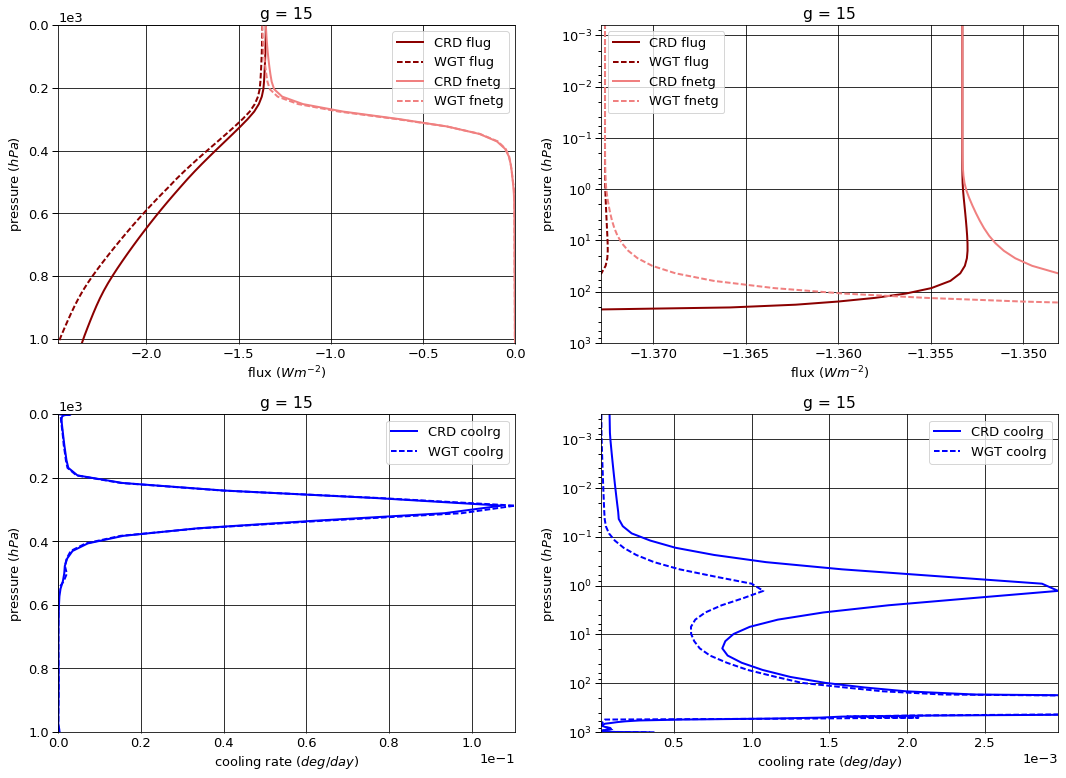

# Figure: flux, cooling rate g-group 16

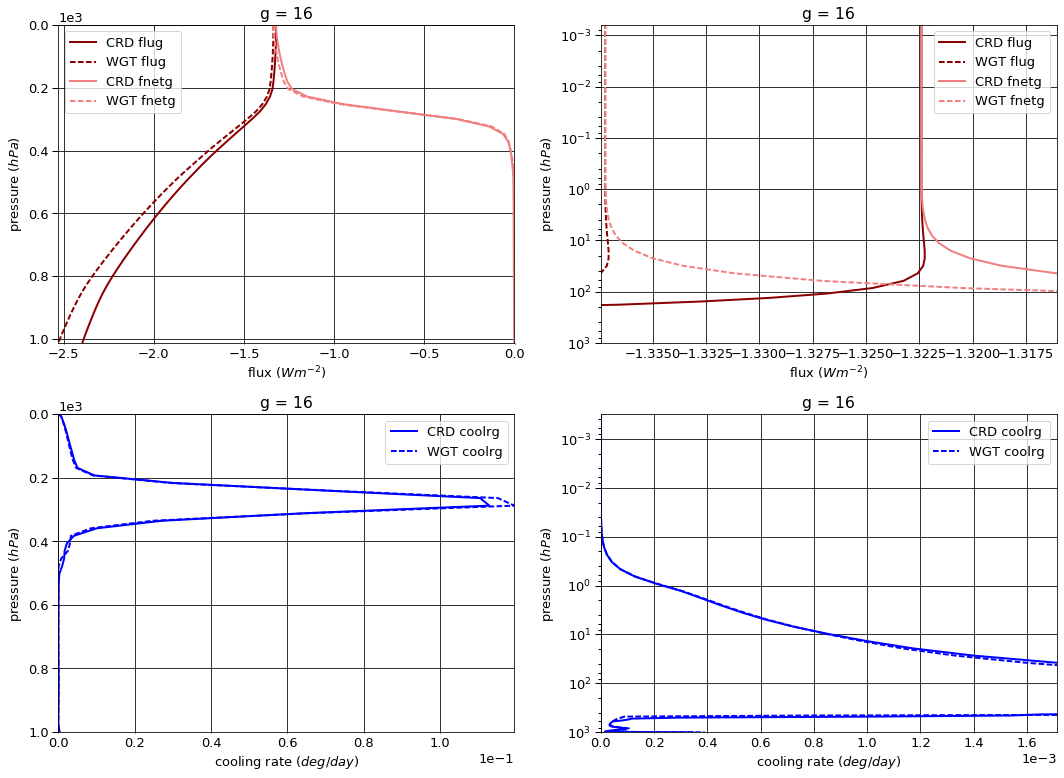

# Figure: flux, cooling rate g-group 17

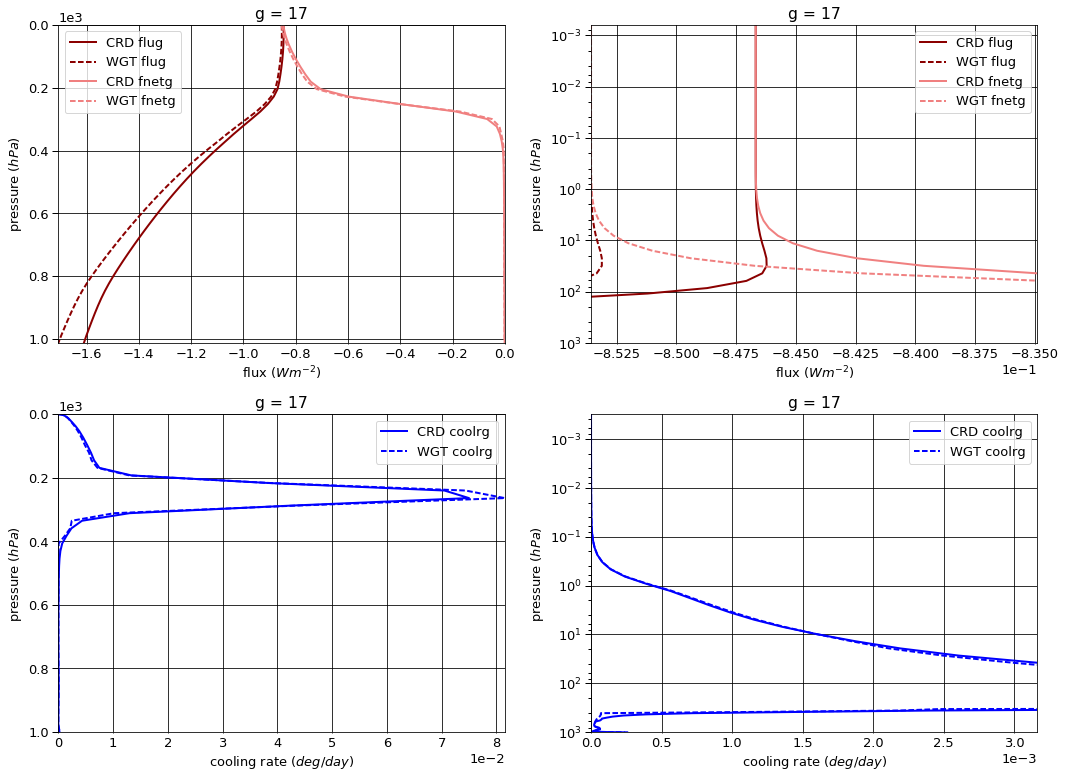

# Figure: flux, cooling rate g-group 18

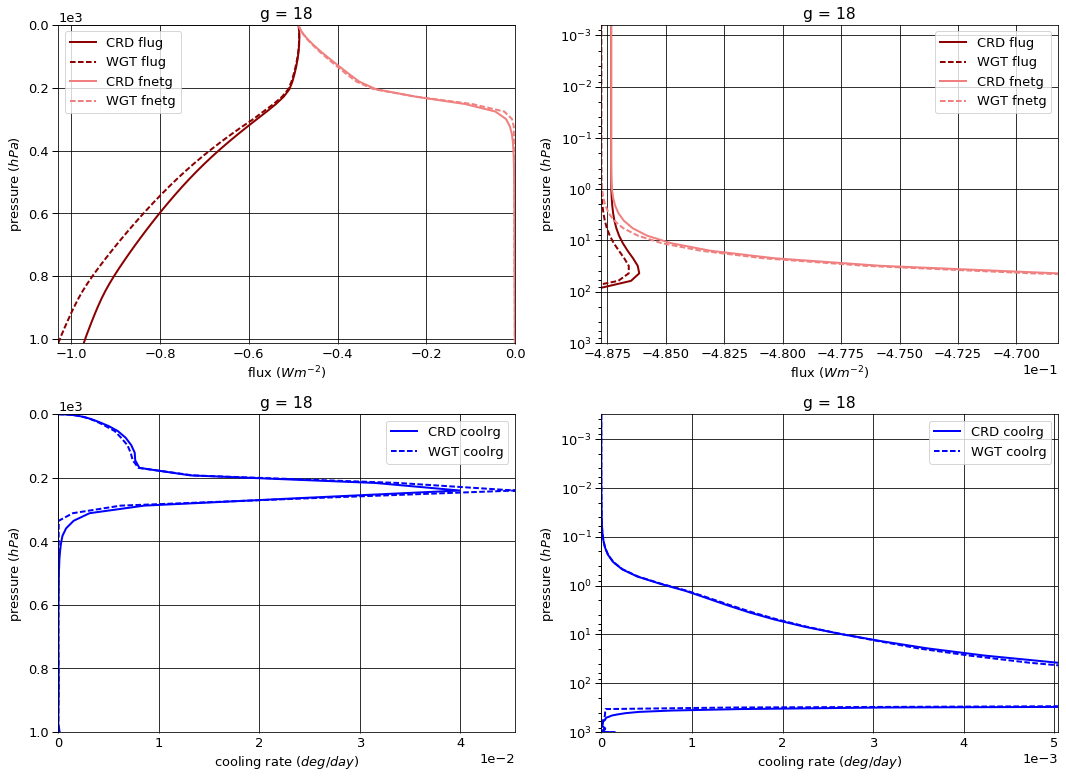

# Figure: flux, cooling rate g-group 19

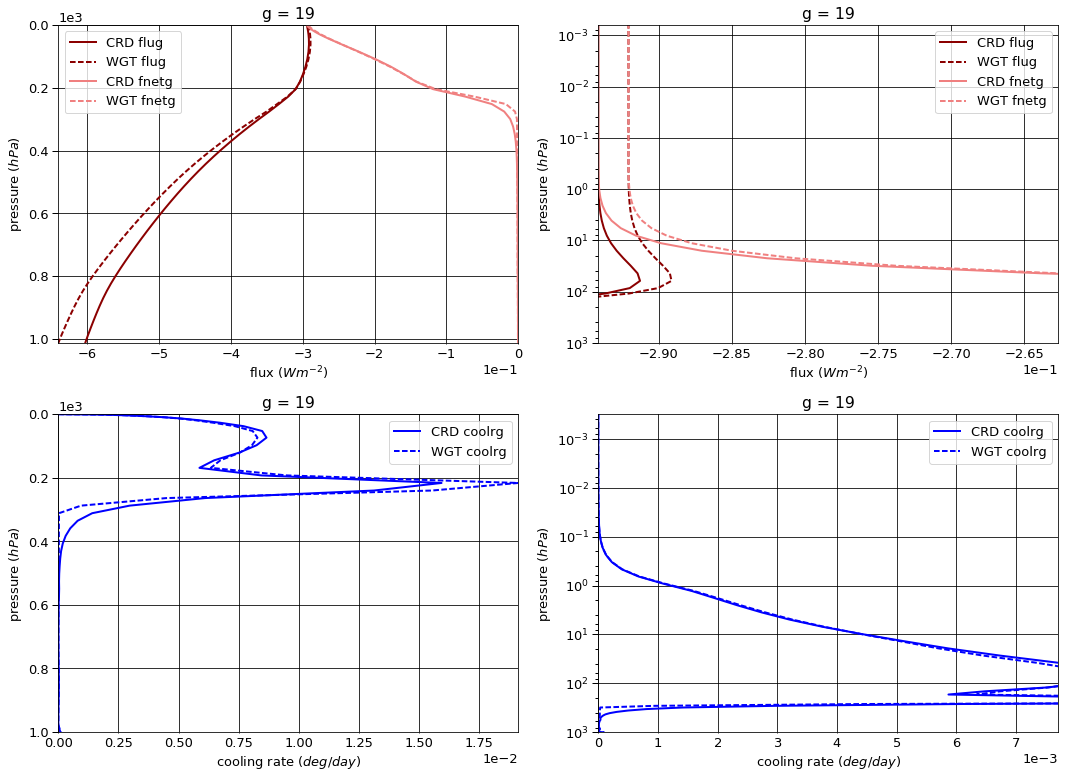

# Figure: flux, cooling rate g-group 20

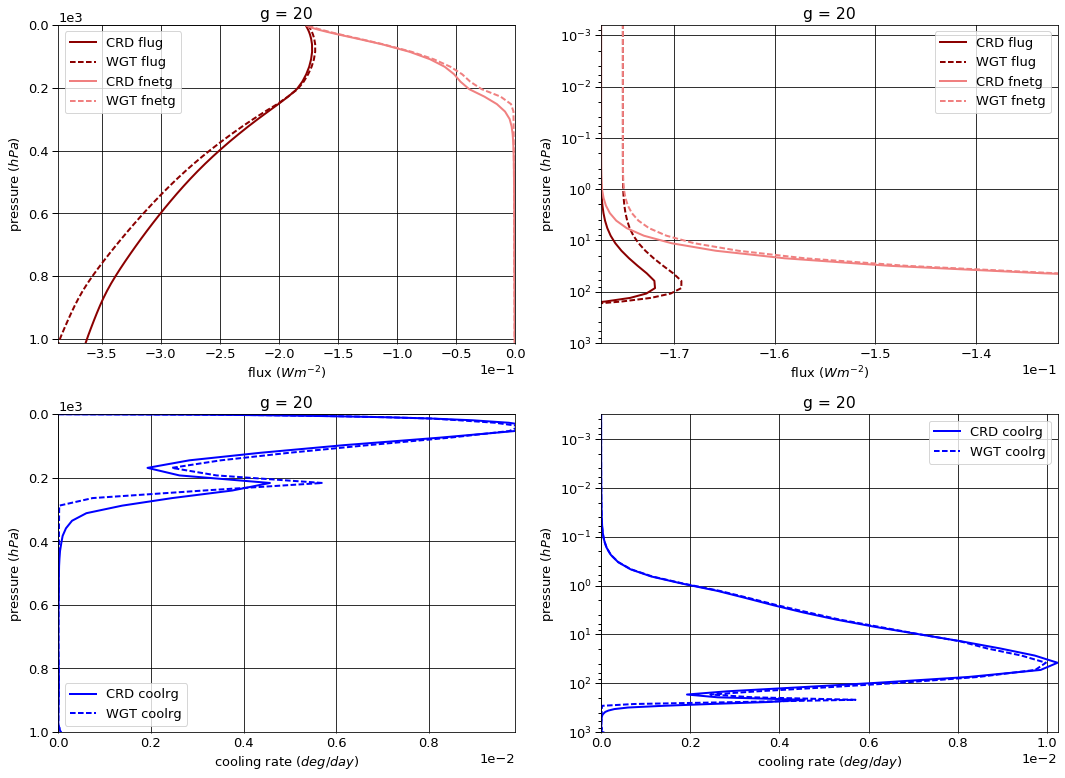

# Figure: flux, cooling rate g-group 21

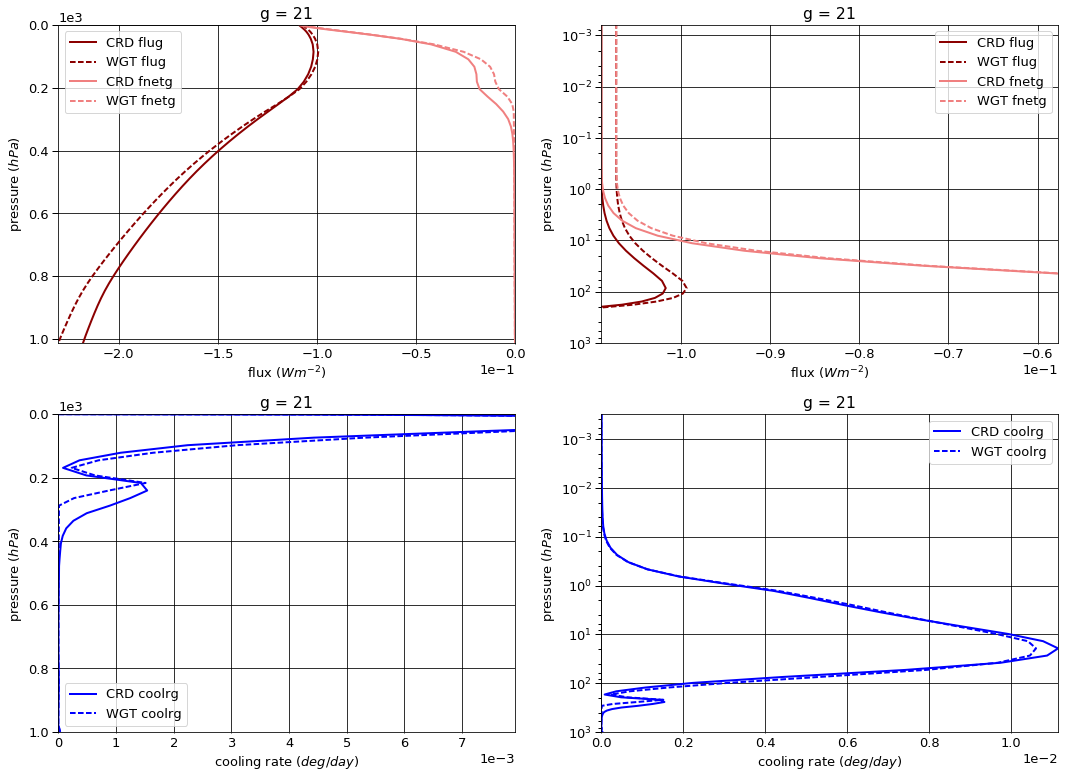

# Figure: flux, cooling rate g-group 22

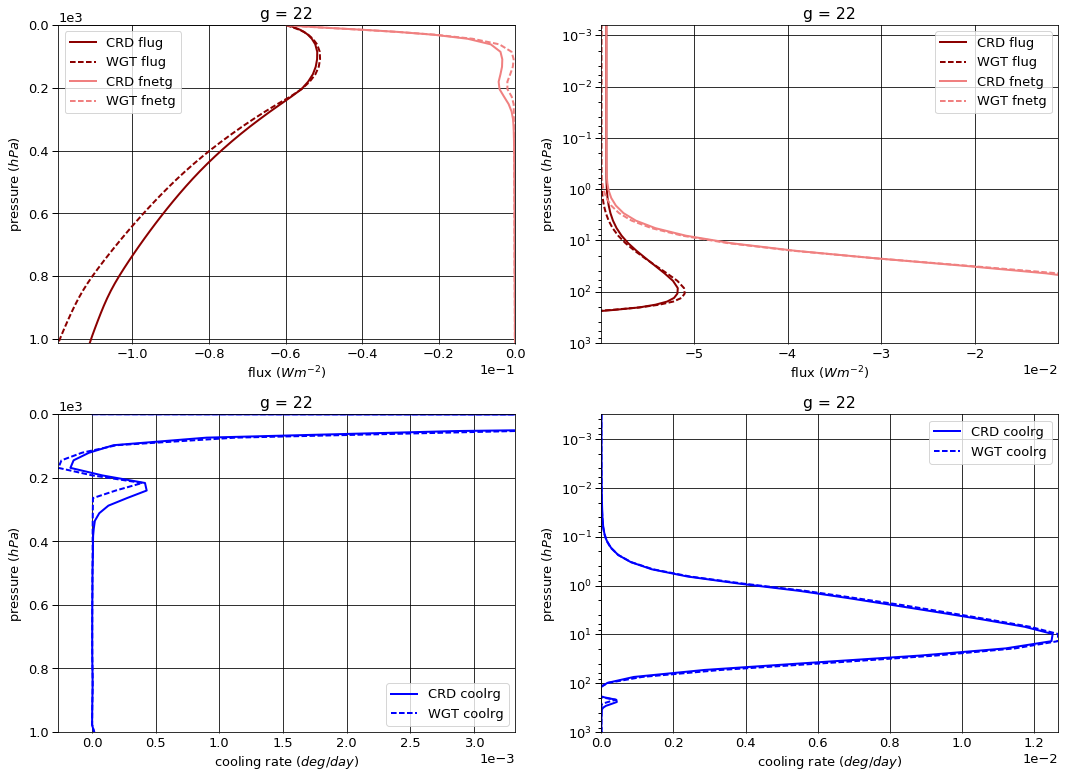

# Figure: flux, cooling rate g-group 23

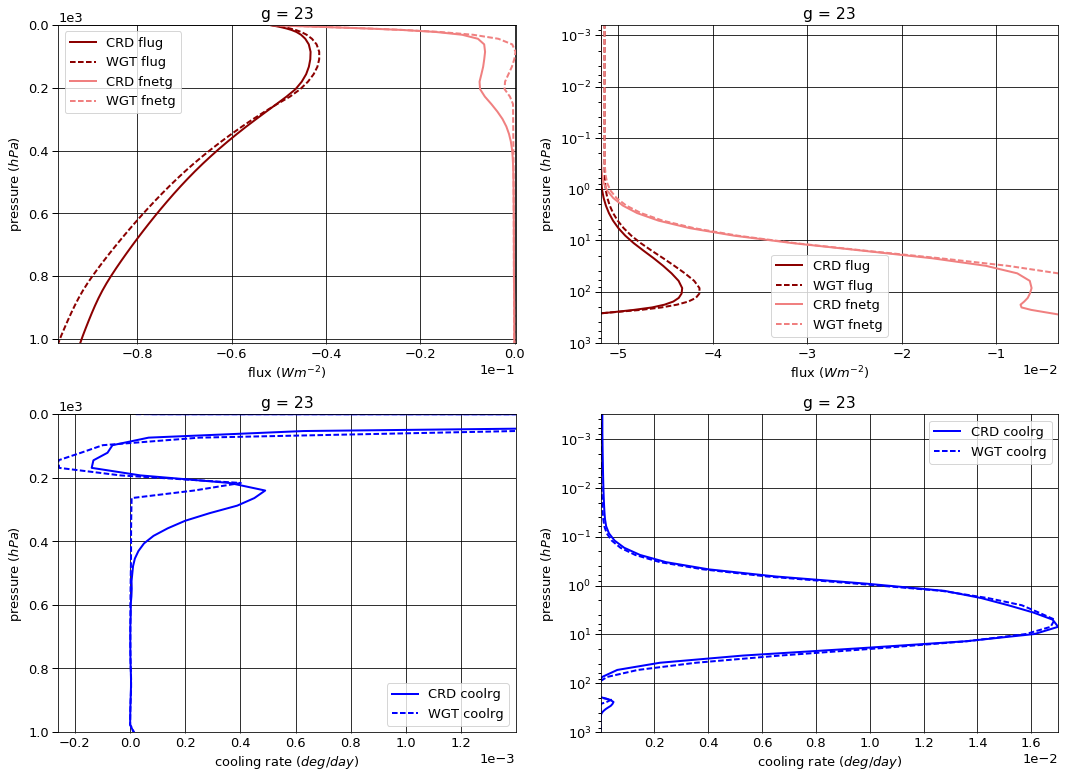

# Figure: flux, cooling rate g-group 24

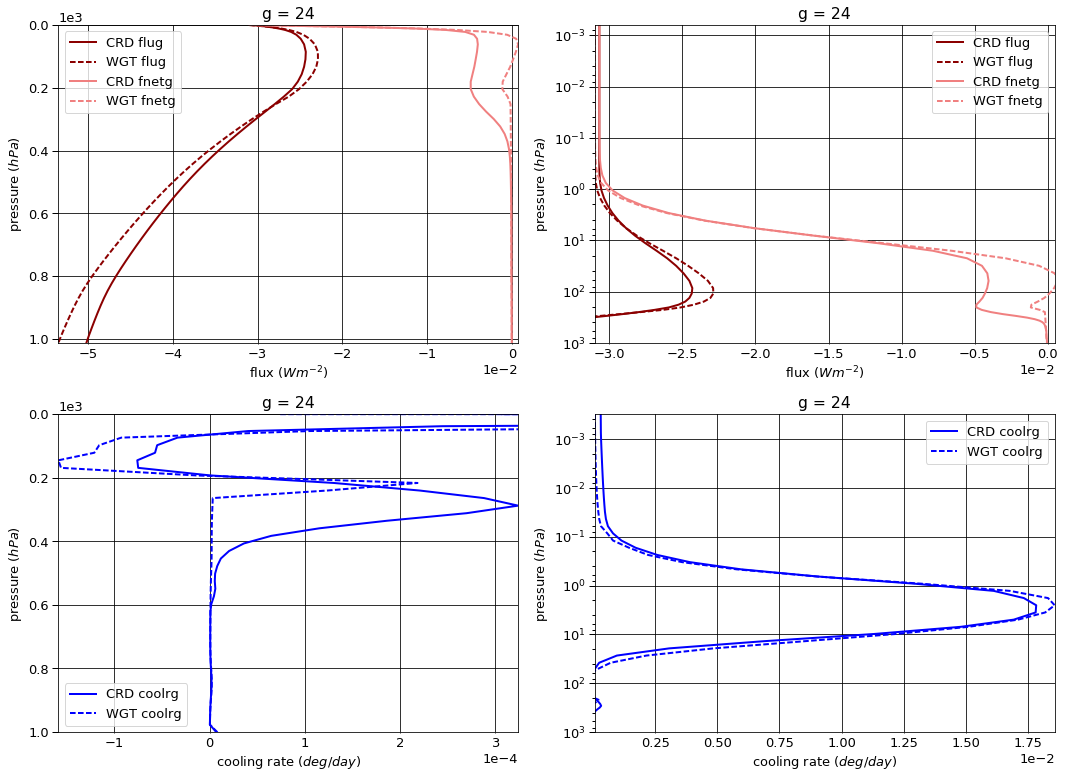

# Figure: flux, cooling rate g-group 25

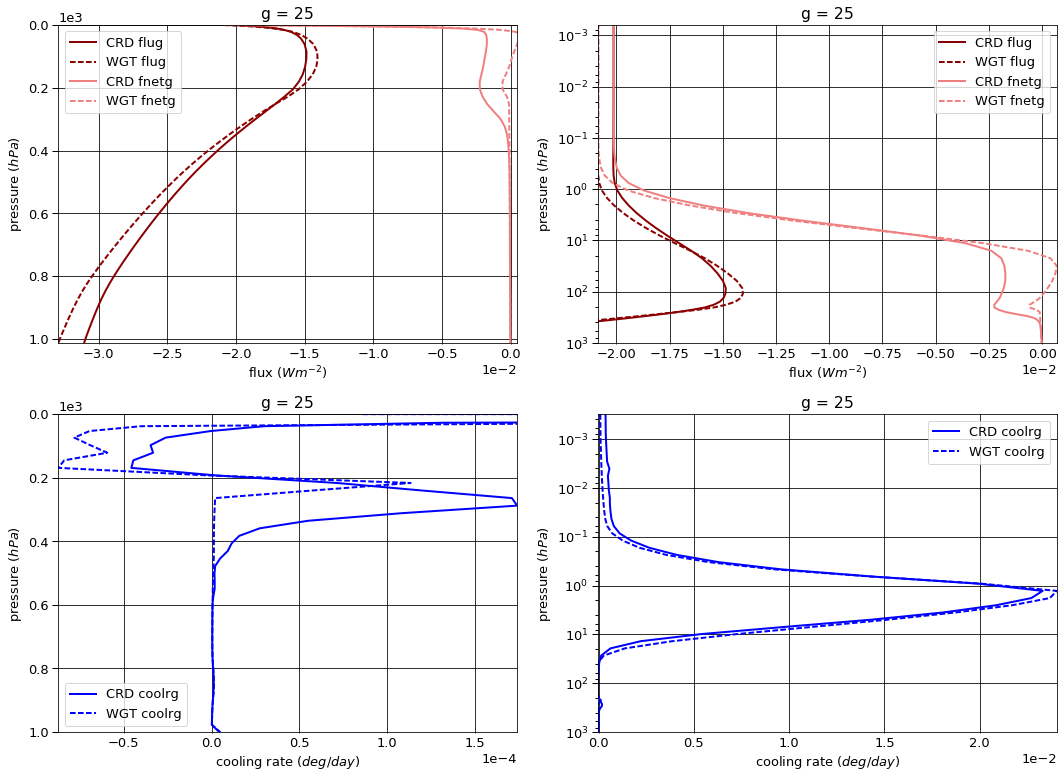

# Figure: flux, cooling rate g-group 26

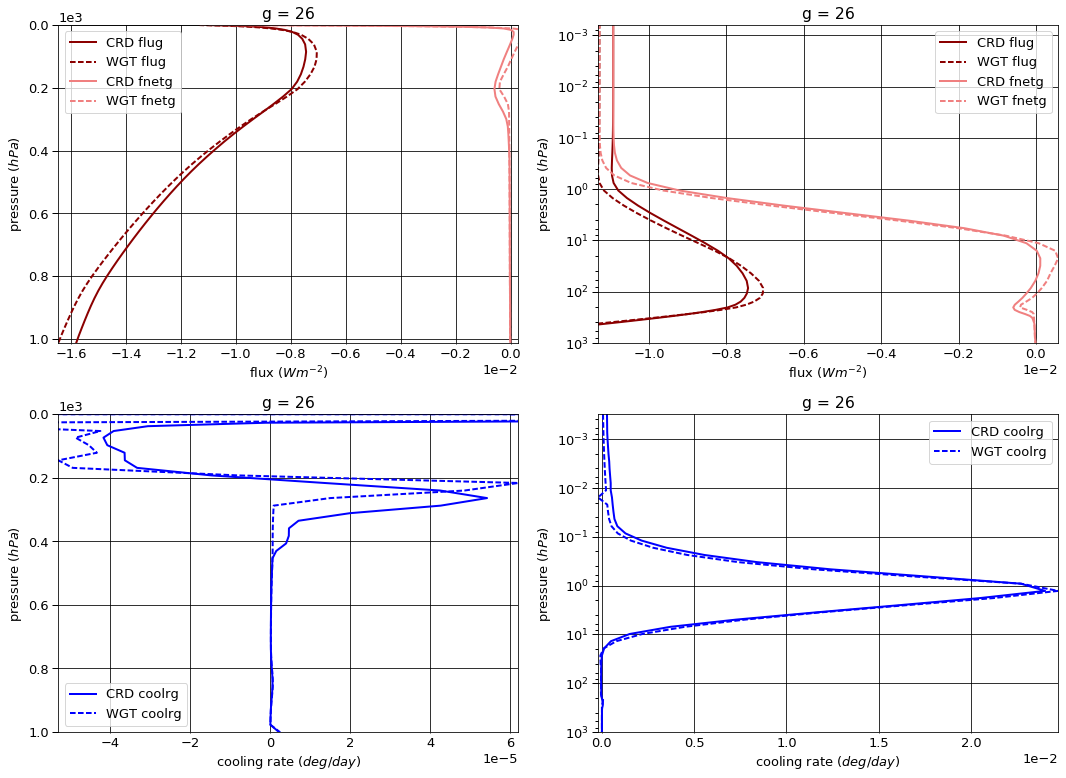

# Figure: flux, cooling rate g-group 27

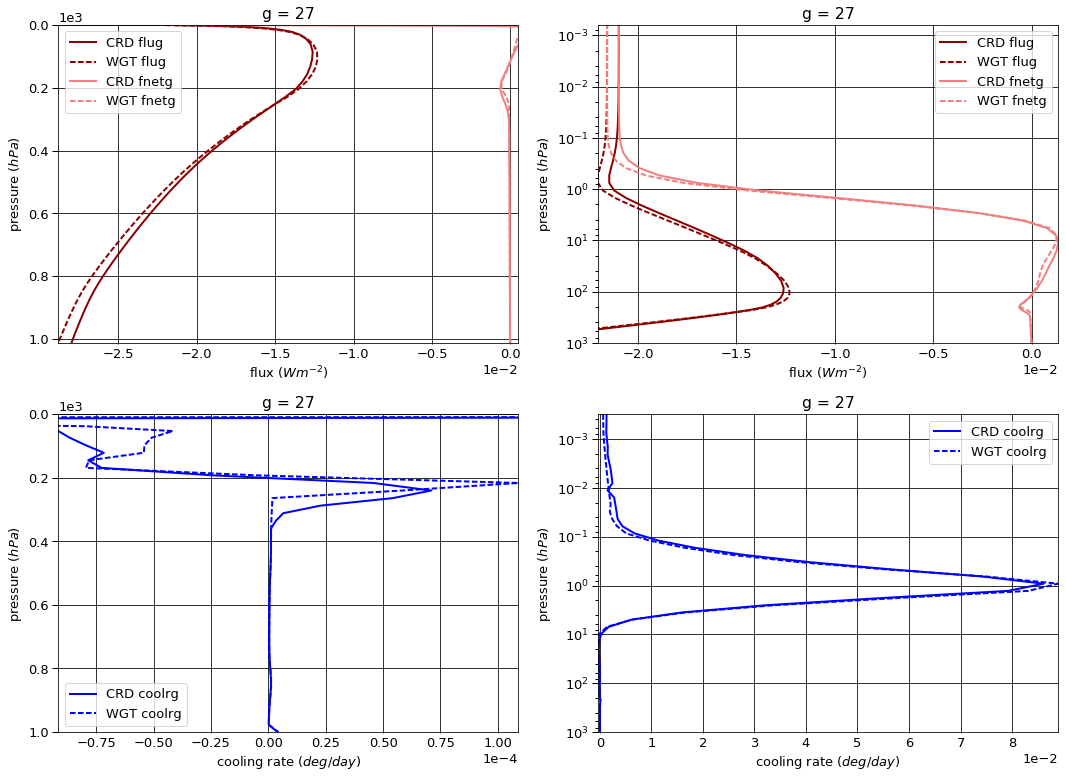

# Figure: flux, cooling rate g-group 28

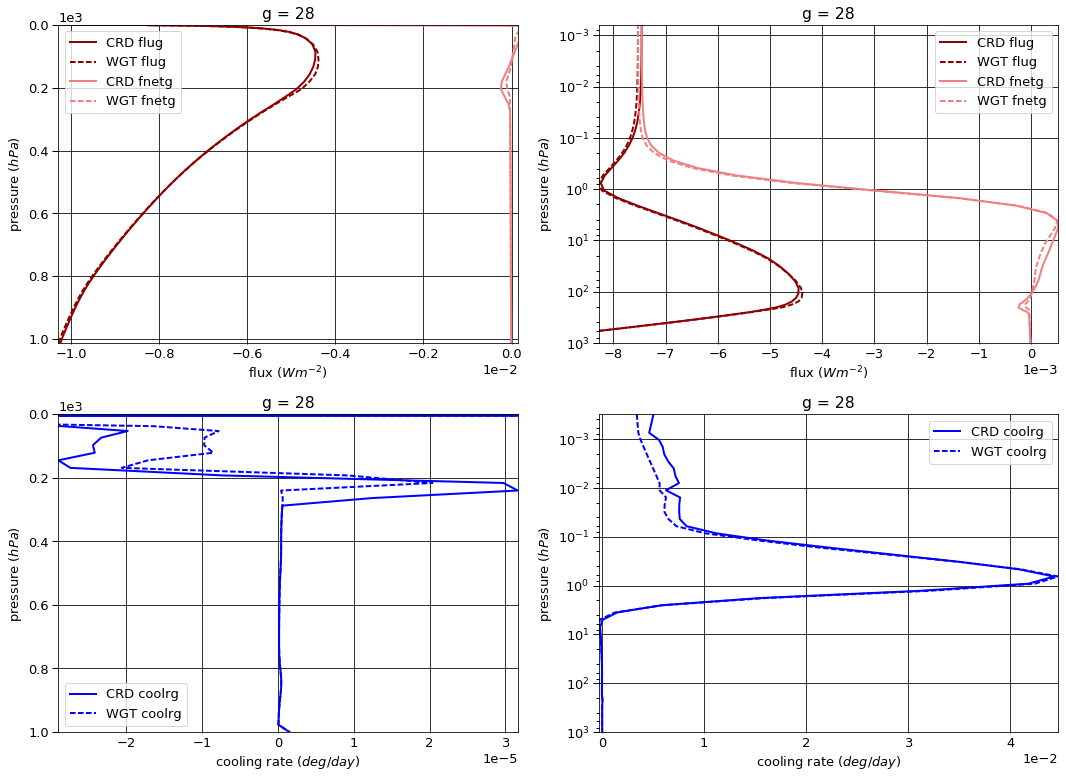

# Figure: flux, cooling rate g-group 29

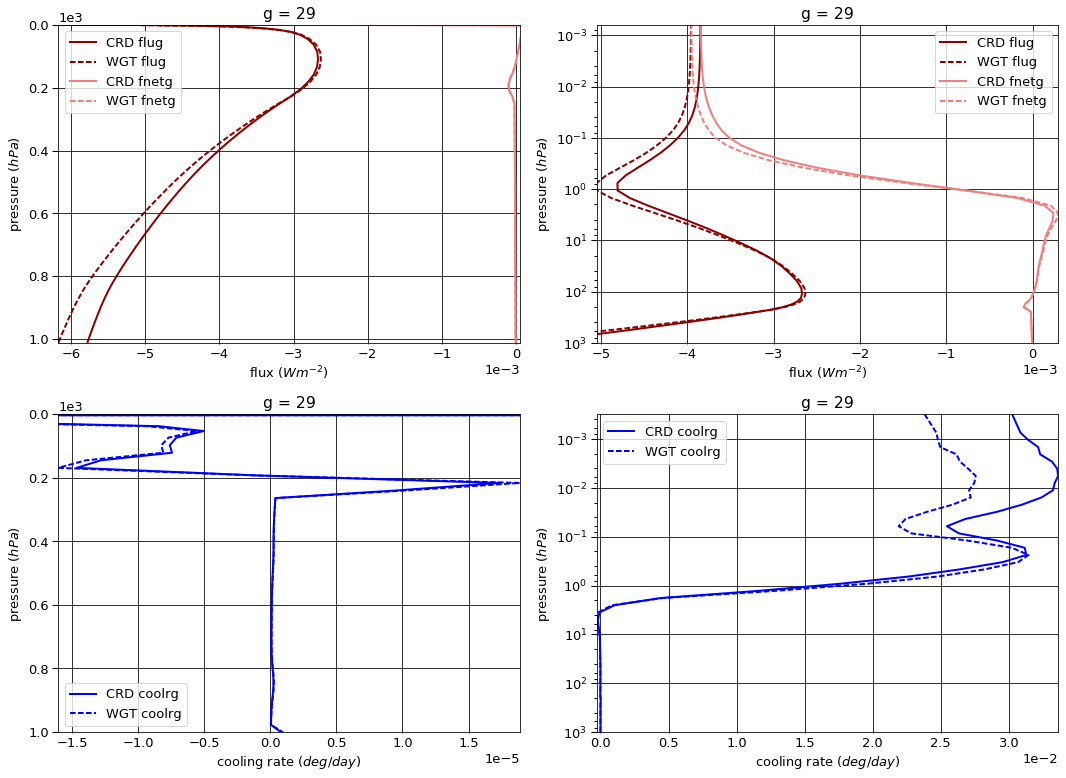

# Figure: flux, cooling rate g-group 30

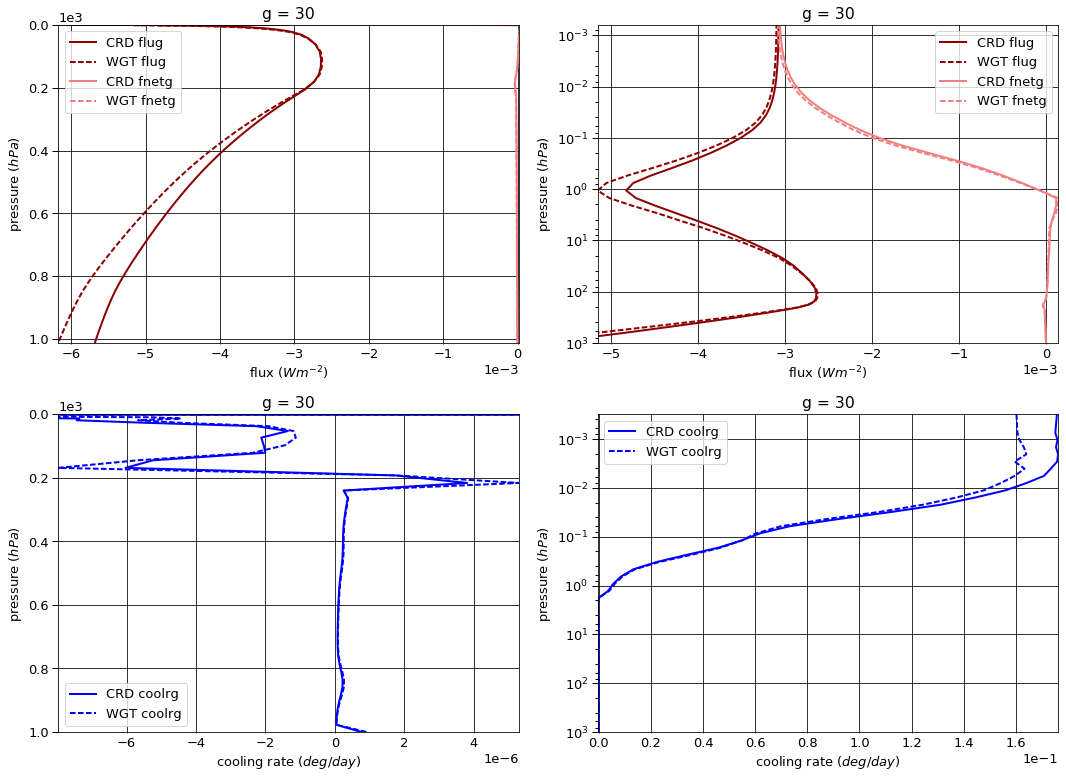

# Figure: flux, cooling rate g-group total

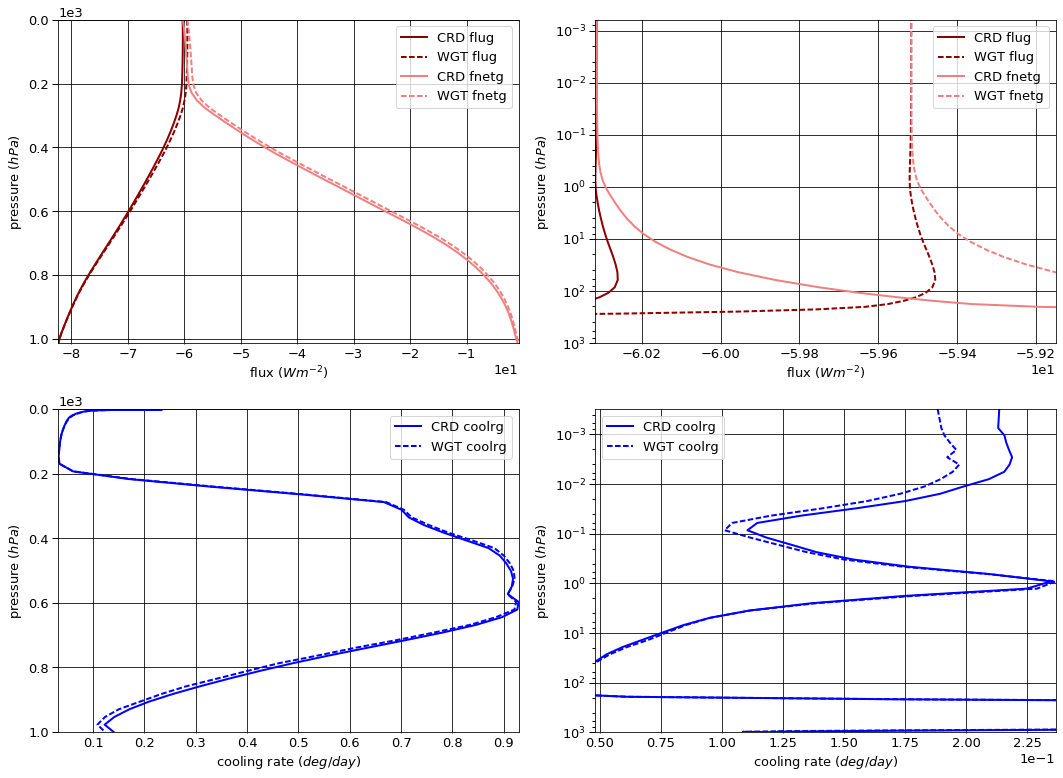

In [16]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [17]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg     fnetg
g  pressure level                              
1  0.0      1     -1.959135  0.000000 -1.959135
   1013.0   76    -2.140636  1.717561 -0.423075
2  0.0      1     -2.646566  0.000000 -2.646566
   1013.0   76    -2.988454  2.769194 -0.219260
3  0.0      1     -4.600626  0.000000 -4.600626
   1013.0   76    -5.361111  5.210850 -0.150261
4  0.0      1     -6.626244  0.000000 -6.626244
   1013.0   76    -7.976655  7.908774 -0.067881
5  0.0      1     -7.224754  0.000000 -7.224754
   1013.0   76    -8.972622  8.931236 -0.041386
6  0.0      1     -6.110440  0.000000 -6.110440
   1013.0   76    -7.877263  7.854429 -0.022835
7  0.0      1     -6.874689  0.000000 -6.874689
   1013.0   76    -9.110121  9.093997 -0.016124
8  0.0      1     -4.337441  0.000000 -4.337441
   1013.0   76    -5.976566  5.969558 -0.007008
9  0.0      1     -3.927909  0.000000 -3.927909
   1013.0   76    -5.604350  5.600819 -0.003531
10 0.0      1     -3.493284  0.000000 -3.493284
   1013.0   76    -5.139824  5.137244 -0.002580
11 0.0      1     -2.399528  0.000000 -2.399528
   1013.0   76    -3.665825  3.664121 -0.001704
12 0.0      1     -1.909573  0.000000 -1.909573
   1013.0   76    -3.020739  3.019408 -0.001332
13 0.0      1     -1.634417  0.000000 -1.634417
   1013.0   76    -2.661684  2.660611 -0.001073
14 0.0      1     -1.771619  0.000000 -1.771619
   1013.0   76    -2.957677  2.956506 -0.001172
15 0.0      1     -1.353302  0.000000 -1.353302
   1013.0   76    -2.349773  2.348830 -0.000943
16 0.0      1     -1.322397  0.000000 -1.322397
   1013.0   76    -2.396194  2.395234 -0.000960
17 0.0      1     -0.846676  0.000000 -0.846676
   1013.0   76    -1.610395  1.609752 -0.000643
18 0.0      1     -0.487333  0.000000 -0.487333
   1013.0   76    -0.971587  0.971198 -0.000389
19 0.0      1     -0.294138  0.000000 -0.294138
   1013.0   76    -0.602584  0.602344 -0.000240
20 0.0      1     -0.177231  0.000000 -0.177231
   1013.0   76    -0.363760  0.363615 -0.000145
21 0.0      1     -0.108971  0.000000 -0.108971
   1013.0   76    -0.218031  0.217944 -0.000088
22 0.0      1     -0.059346  0.000000 -0.059346
   1013.0   76    -0.111146  0.111102 -0.000044
23 0.0      1     -0.051851  0.000000 -0.051851
   1013.0   76    -0.092075  0.092038 -0.000037
24 0.0      1     -0.030691  0.000000 -0.030691
   1013.0   76    -0.050203  0.050183 -0.000020
25 0.0      1     -0.020131  0.000000 -0.020131
   1013.0   76    -0.031056  0.031044 -0.000012
26 0.0      1     -0.010929  0.000000 -0.010929
   1013.0   76    -0.015813  0.015807 -0.000006
27 0.0      1     -0.020974  0.000000 -0.020974
   1013.0   76    -0.027974  0.027962 -0.000011
28 0.0      1     -0.007459  0.000000 -0.007459
   1013.0   76    -0.010244  0.010240 -0.000004
29 0.0      1     -0.003845  0.000000 -0.003845
   1013.0   76    -0.005782  0.005780 -0.000002
30 0.0      1     -0.003074  0.000000 -0.003074
   1013.0   76    -0.005683  0.005681 -0.000002


WGT


flug      fldg     fnetg
g  pressure level                              
1  0.0      1     -1.811959  0.000000 -1.811959
   1013.0   76    -1.959117  1.588068 -0.371049
2  0.0      1     -2.473831  0.000000 -2.473831
   1013.0   76    -2.761696  2.587094 -0.174602
3  0.0      1     -4.333411  0.000000 -4.333411
   1013.0   76    -4.988339  4.876586 -0.111753
4  0.0      1     -6.401974  0.000000 -6.401974
   1013.0   76    -7.657430  7.607375 -0.050055
5  0.0      1     -7.041947  0.000000 -7.041947
   1013.0   76    -8.709015  8.674371 -0.034644
6  0.0      1     -5.984064  0.000000 -5.984064
   1013.0   76    -7.686241  7.667261 -0.018980
7  0.0      1     -6.910080  0.000000 -6.910080
   1013.0   76    -9.209083  9.193994 -0.015089
8  0.0      1     -4.336136  0.000000 -4.336136
   1013.0   76    -6.004940  5.998974 -0.005965
9  0.0      1     -3.962247  0.000000 -3.962247
   1013.0   76    -5.716834  5.714391 -0.002443
10 0.0      1     -3.566188  0.000000 -3.566188
   1013.0   76    -5.346413  5.344128 -0.002285
11 0.0      1     -2.435885  0.000000 -2.435885
   1013.0   76    -3.790644  3.789024 -0.001620
12 0.0      1     -1.939539  0.000000 -1.939539
   1013.0   76    -3.144465  3.143121 -0.001344
13 0.0      1     -1.669095  0.000000 -1.669095
   1013.0   76    -2.806970  2.805770 -0.001200
14 0.0      1     -1.813803  0.000000 -1.813803
   1013.0   76    -3.162986  3.161634 -0.001352
15 0.0      1     -1.372608  0.000000 -1.372608
   1013.0   76    -2.477707  2.476648 -0.001059
16 0.0      1     -1.337222  0.000000 -1.337222
   1013.0   76    -2.529154  2.528073 -0.001081
17 0.0      1     -0.853568  0.000000 -0.853568
   1013.0   76    -1.708053  1.707323 -0.000730
18 0.0      1     -0.487755  0.000000 -0.487755
   1013.0   76    -1.028948  1.028508 -0.000440
19 0.0      1     -0.292072  0.000000 -0.292072
   1013.0   76    -0.640006  0.639732 -0.000273
20 0.0      1     -0.175064  0.000000 -0.175064
   1013.0   76    -0.386884  0.386719 -0.000165
21 0.0      1     -0.107307  0.000000 -0.107307
   1013.0   76    -0.230484  0.230386 -0.000098
22 0.0      1     -0.059879  0.000000 -0.059879
   1013.0   76    -0.119358  0.119307 -0.000051
23 0.0      1     -0.051466  0.000000 -0.051466
   1013.0   76    -0.096721  0.096680 -0.000041
24 0.0      1     -0.030990  0.000000 -0.030990
   1013.0   76    -0.053505  0.053482 -0.000023
25 0.0      1     -0.020852  0.000000 -0.020852
   1013.0   76    -0.032926  0.032912 -0.000014
26 0.0      1     -0.011286  0.000000 -0.011286
   1013.0   76    -0.016463  0.016456 -0.000007
27 0.0      1     -0.021569  0.000000 -0.021569
   1013.0   76    -0.028811  0.028798 -0.000012
28 0.0      1     -0.007529  0.000000 -0.007529
   1013.0   76    -0.010289  0.010285 -0.000004
29 0.0      1     -0.003954  0.000000 -0.003954
   1013.0   76    -0.006174  0.006171 -0.000003
30 0.0      1     -0.003098  0.000000 -0.003098
   1013.0   76    -0.006174  0.006171 -0.000003


WGT - CRD


flug      fldg         fnetg
g  pressure level                                  
1  0.0      1      0.147175  0.000000  1.471754e-01
   1013.0   76     0.181519 -0.129493  5.202689e-02
2  0.0      1      0.172736  0.000000  1.727356e-01
   1013.0   76     0.226758 -0.182100  4.465804e-02
3  0.0      1      0.267215  0.000000  2.672148e-01
   1013.0   76     0.372772 -0.334264  3.850788e-02
4  0.0      1      0.224270  0.000000  2.242699e-01
   1013.0   76     0.319225 -0.301399  1.782582e-02
5  0.0      1      0.182806  0.000000  1.828063e-01
   1013.0   76     0.263607 -0.256865  6.741783e-03
6  0.0      1      0.126376  0.000000  1.263763e-01
   1013.0   76     0.191023 -0.187168  3.855037e-03
7  0.0      1     -0.035391  0.000000 -3.539060e-02
   1013.0   76    -0.098962  0.099997  1.034443e-03
8  0.0      1      0.001304  0.000000  1.304300e-03
   1013.0   76    -0.028373  0.029416  1.042632e-03
9  0.0      1     -0.034338  0.000000 -3.433790e-02
   1013.0   76    -0.112484  0.113572  1.088043e-03
10 0.0      1     -0.072904  0.000000 -7.290370e-02
   1013.0   76    -0.206589  0.206885  2.951657e-04
11 0.0      1     -0.036357  0.000000 -3.635680e-02
   1013.0   76    -0.124819  0.124903  8.419330e-05
12 0.0      1     -0.029966  0.000000 -2.996560e-02
   1013.0   76    -0.123725  0.123713 -1.194330e-05
13 0.0      1     -0.034678  0.000000 -3.467820e-02
   1013.0   76    -0.145285  0.145159 -1.265243e-04
14 0.0      1     -0.042183  0.000000 -4.218310e-02
   1013.0   76    -0.205308  0.205129 -1.799364e-04
15 0.0      1     -0.019306  0.000000 -1.930580e-02
   1013.0   76    -0.127934  0.127817 -1.161606e-04
16 0.0      1     -0.014825  0.000000 -1.482490e-02
   1013.0   76    -0.132960  0.132839 -1.205784e-04
17 0.0      1     -0.006892  0.000000 -6.892370e-03
   1013.0   76    -0.097659  0.097572 -8.691632e-05
18 0.0      1     -0.000422  0.000000 -4.216100e-04
   1013.0   76    -0.057361  0.057310 -5.109320e-05
19 0.0      1      0.002066  0.000000  2.065630e-03
   1013.0   76    -0.037421  0.037388 -3.328700e-05
20 0.0      1      0.002167  0.000000  2.167150e-03
   1013.0   76    -0.023124  0.023104 -2.066913e-05
21 0.0      1      0.001664  0.000000  1.664050e-03
   1013.0   76    -0.012453  0.012442 -1.091910e-05
22 0.0      1     -0.000533  0.000000 -5.327070e-04
   1013.0   76    -0.008212  0.008205 -7.207047e-06
23 0.0      1      0.000385  0.000000  3.847670e-04
   1013.0   76    -0.004646  0.004641 -4.115562e-06
24 0.0      1     -0.000300  0.000000 -2.996300e-04
   1013.0   76    -0.003303  0.003300 -2.880797e-06
25 0.0      1     -0.000721  0.000000 -7.207400e-04
   1013.0   76    -0.001870  0.001869 -1.615331e-06
26 0.0      1     -0.000357  0.000000 -3.570070e-04
   1013.0   76    -0.000650  0.000649 -6.260230e-07
27 0.0      1     -0.000596  0.000000 -5.956050e-04
   1013.0   76    -0.000837  0.000836 -8.148290e-07
28 0.0      1     -0.000071  0.000000 -7.071710e-05
   1013.0   76    -0.000045  0.000045 -8.658090e-08
29 0.0      1     -0.000108  0.000000 -1.084190e-04
   1013.0   76    -0.000391  0.000391 -3.886218e-07
30 0.0      1     -0.000024  0.000000 -2.393970e-05
   1013.0   76    -0.000491  0.000490 -4.462005e-07

# Table: cooling rate. g-groups 


CRD


coolrg
g  pressure    layer              
1  0.000312    1     -3.632466e-10
   1001.112500 75     3.194887e-02
2  0.000312    1     -2.641793e-09
   1001.112500 75     2.826344e-02
3  0.000312    1     -2.753469e-08
   1001.112500 75     2.803654e-02
4  0.000312    1     -9.350748e-08
   1001.112500 75     1.794348e-02
5  0.000312    1     -1.785252e-07
   1001.112500 75     1.267034e-02
6  0.000312    1      5.617413e-08
   1001.112500 75     7.863174e-03
7  0.000312    1      1.452146e-07
   1001.112500 75     6.068879e-03
8  0.000312    1      2.014487e-07
   1001.112500 75     2.714885e-03
9  0.000312    1      5.068461e-07
   1001.112500 75     1.354236e-03
10 0.000312    1      8.196596e-06
   1001.112500 75     9.474948e-04
11 0.000312    1      9.497799e-06
   1001.112500 75     6.187381e-04
12 0.000312    1      3.576718e-05
   1001.112500 75     4.821238e-04
13 0.000312    1      2.007144e-05
   1001.112500 75     3.876073e-04
14 0.000312    1      5.480230e-05
   1001.112500 75     4.233064e-04
15 0.000312    1      8.602672e-05
   1001.112500 75     3.405333e-04
16 0.000312    1      9.069157e-09
   1001.112500 75     3.468813e-04
17 0.000312    1      1.644787e-07
   1001.112500 75     2.322868e-04
18 0.000312    1      1.188747e-07
   1001.112500 75     1.403881e-04
19 0.000312    1      7.042541e-07
   1001.112500 75     8.677828e-05
20 0.000312    1      2.078506e-06
   1001.112500 75     5.226069e-05
21 0.000312    1      9.851219e-06
   1001.112500 75     3.163611e-05
22 0.000312    1      4.308980e-06
   1001.112500 75     1.582361e-05
23 0.000312    1      7.469566e-05
   1001.112500 75     1.344402e-05
24 0.000312    1      3.075414e-04
   1001.112500 75     7.219416e-06
25 0.000312    1      3.623914e-04
   1001.112500 75     4.499437e-06
26 0.000312    1      2.748447e-04
   1001.112500 75     2.315253e-06
27 0.000312    1      1.283804e-03
   1001.112500 75     4.152824e-06
28 0.000312    1      5.037201e-03
   1001.112500 75     1.556847e-06
29 0.000312    1      3.024933e-02
   1001.112500 75     8.128130e-07
30 0.000312    1      1.756868e-01
   1001.112500 75     7.920275e-07


WGT


coolrg
g  pressure    layer              
1  0.000312    1     -5.103465e-11
   1001.112500 75     2.958128e-02
2  0.000312    1     -3.962690e-10
   1001.112500 75     2.515198e-02
3  0.000312    1     -3.122119e-09
   1001.112500 75     2.349062e-02
4  0.000312    1     -5.896003e-09
   1001.112500 75     1.392765e-02
5  0.000312    1      1.104750e-09
   1001.112500 75     1.135645e-02
6  0.000312    1      2.256332e-08
   1001.112500 75     7.043083e-03
7  0.000312    1      6.394341e-08
   1001.112500 75     5.850982e-03
8  0.000312    1      9.594513e-08
   1001.112500 75     2.534026e-03
9  0.000312    1      4.983863e-07
   1001.112500 75     8.822732e-04
10 0.000312    1      3.014346e-06
   1001.112500 75     8.251065e-04
11 0.000312    1      4.580498e-06
   1001.112500 75     5.850062e-04
12 0.000312    1      1.394776e-05
   1001.112500 75     4.852820e-04
13 0.000312    1      6.862734e-06
   1001.112500 75     4.331968e-04
14 0.000312    1      1.758283e-05
   1001.112500 75     4.881404e-04
15 0.000312    1      3.323008e-05
   1001.112500 75     3.823819e-04
16 0.000312    1      7.351991e-09
   1001.112500 75     3.903217e-04
17 0.000312    1      5.821252e-08
   1001.112500 75     2.636021e-04
18 0.000312    1      5.422131e-08
   1001.112500 75     1.587965e-04
19 0.000312    1      2.335818e-07
   1001.112500 75     9.877141e-05
20 0.000312    1      6.475763e-07
   1001.112500 75     5.970748e-05
21 0.000312    1      3.093613e-06
   1001.112500 75     3.557041e-05
22 0.000312    1      1.054990e-06
   1001.112500 75     1.842039e-05
23 0.000312    1      2.067047e-05
   1001.112500 75     1.492687e-05
24 0.000312    1      7.423665e-05
   1001.112500 75     8.257417e-06
25 0.000312    1      8.614333e-05
   1001.112500 75     5.081487e-06
26 0.000312    1      5.978363e-05
   1001.112500 75     2.540744e-06
27 0.000312    1      6.164411e-04
   1001.112500 75     4.446301e-06
28 0.000312    1      3.389175e-03
   1001.112500 75     1.587965e-06
29 0.000312    1      2.381449e-02
   1001.112500 75     9.527788e-07
30 0.000312    1      1.601740e-01
   1001.112500 75     9.527788e-07


WGT - CRD


coolrg
g  pressure    layer              
1  0.000312    1      3.122119e-10
   1001.112500 75    -2.367592e-03
2  0.000312    1      2.245524e-09
   1001.112500 75    -3.111464e-03
3  0.000312    1      2.441257e-08
   1001.112500 75    -4.545927e-03
4  0.000312    1      8.761147e-08
   1001.112500 75    -4.015827e-03
5  0.000312    1      1.796299e-07
   1001.112500 75    -1.313892e-03
6  0.000312    1     -3.361082e-08
   1001.112500 75    -8.200911e-04
7  0.000312    1     -8.127117e-08
   1001.112500 75    -2.178962e-04
8  0.000312    1     -1.055036e-07
   1001.112500 75    -1.808594e-04
9  0.000312    1     -8.459740e-09
   1001.112500 75    -4.719627e-04
10 0.000312    1     -5.182250e-06
   1001.112500 75    -1.223883e-04
11 0.000312    1     -4.917302e-06
   1001.112500 75    -3.373190e-05
12 0.000312    1     -2.181942e-05
   1001.112500 75     3.158270e-06
13 0.000312    1     -1.320870e-05
   1001.112500 75     4.558952e-05
14 0.000312    1     -3.721947e-05
   1001.112500 75     6.483392e-05
15 0.000312    1     -5.279664e-05
   1001.112500 75     4.184860e-05
16 0.000312    1     -1.717166e-09
   1001.112500 75     4.344040e-05
17 0.000312    1     -1.062661e-07
   1001.112500 75     3.131531e-05
18 0.000312    1     -6.465339e-08
   1001.112500 75     1.840841e-05
19 0.000312    1     -4.706723e-07
   1001.112500 75     1.199313e-05
20 0.000312    1     -1.430930e-06
   1001.112500 75     7.446789e-06
21 0.000312    1     -6.757606e-06
   1001.112500 75     3.934304e-06
22 0.000312    1     -3.253990e-06
   1001.112500 75     2.596784e-06
23 0.000312    1     -5.402520e-05
   1001.112500 75     1.482850e-06
24 0.000312    1     -2.333048e-04
   1001.112500 75     1.038001e-06
25 0.000312    1     -2.762480e-04
   1001.112500 75     5.820502e-07
26 0.000312    1     -2.150610e-04
   1001.112500 75     2.254908e-07
27 0.000312    1     -6.673632e-04
   1001.112500 75     2.934771e-07
28 0.000312    1     -1.648026e-03
   1001.112500 75     3.111760e-08
29 0.000312    1     -6.434843e-03
   1001.112500 75     1.399659e-07
30 0.000312    1     -1.551288e-02
   1001.112500 75     1.607513e-07

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-60.314573,0.000000,-60.314573
1013.0,76,-82.315829,81.353061,-0.962768



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-59.516378,0.000000,-59.516378
1013.0,76,-82.315829,81.519445,-0.796385



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,7.981949e-01,0.000000,0.798195
1013.0,76,7.360001e-08,0.166384,0.166384


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,0.213509
1001.112500,75,0.141004



WGT


,,coolrg
pressure,layer,
0.000312,1,0.188320
1001.112500,75,0.124081



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-0.025189
1001.112500,75,-0.016923


In [18]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.023800,0.024421
2,0.033550,0.034587
3,0.060600,0.062501
4,0.093025,0.095106
5,0.105800,0.107857
6,0.093375,0.094888
7,0.111875,0.111507
8,0.072950,0.072973
9,0.069450,0.068878


In [19]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,2.647432e-24
2,4.404217e-24
3,7.326771e-24
4,1.218868e-23
5,2.027685e-23
6,3.373218e-23
7,5.611620e-23
8,9.335384e-23
9,1.553017e-22


In [20]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')